In [2]:
# Imports :
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import math
import pandas as pd

In [3]:
df = pd.read_table('horse_data23.txt')
class_names = np.unique(df['lameLeg'])
y = df['lameLeg']
c  =  np.array(pd.get_dummies(y)) @ np.array([1,2,3,4,5])

### **3. CLASSIFICATION WITH RESPECT TO DIAGONAL ELEMENTS**

In [4]:
X3 = df[['S', 'W', 'pc3', 'pc4']]
y_diag =np.array(pd.get_dummies(y)) @ np.array([1,2,3,2,1])

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



print_running_accuracy = False

LogisticModel_accuracy = np.zeros(8)
RandomForest_accuracy = np.zeros(8)
Baseline_accuracy = np.zeros(8)

# cross-validation loop for each horse
for i in range(8):
    # printing
    print("CV-loop: " + str(i+1)) if print_running_accuracy else print("CV-loop: " + str(i+1), end = '\r') 
    # indexing
    index_test = df['horse'] == np.unique(df['horse'])[i]
    index_train = df['horse'] != np.unique(df['horse'])[i]

    # splitting the data
    X_train, y_train = X3[index_train], y_diag[index_train]
    X_test, y_test = X3[index_test], y_diag[index_test]

    # baseline
    _, counts = np.unique(y_train, return_counts=True)
    Baseline_y_pred = np.argmax(counts) + 1
    Baseline_accuracy[i] =  sum(y_test == Baseline_y_pred)/len(y_test)
    if print_running_accuracy: print("Baseline's accuracy:", Baseline_accuracy[i])


    # logistic
    LogisticModel = LogisticRegression()
    LogisticModel.fit(X_train, y_train)
    Logistic_y_pred = LogisticModel.predict(X_test)
    LogisticModel_accuracy[i] = sum(Logistic_y_pred == y_test)/len(y_test)
    if print_running_accuracy: print("LogisticModel's accuracy:", LogisticModel_accuracy[i])

    # randomforest
    RandomForestModel = RandomForestClassifier(n_estimators=1000)
    RandomForestModel.fit(X_train, y_train)
    RandomForest_y_pred = RandomForestModel.predict(X_test)
    RandomForest_accuracy[i] = sum(RandomForest_y_pred == y_test)/len(y_test)
    if print_running_accuracy: print("RandomForestModel's accuracy:", RandomForest_accuracy[i])

    
print("--------------------------------------")
print("The mean accuracy for Baseline: ", np.mean(Baseline_accuracy))
print("The mean accuracy for LogisticModel: ", np.mean(LogisticModel_accuracy))
print("The mean accuracy for RandomForestModel: ", np.mean(RandomForest_accuracy))

--------------------------------------
The mean accuracy for Baseline:  0.3626068376068376
The mean accuracy for LogisticModel:  0.7816239316239316
The mean accuracy for RandomForestModel:  0.8232905982905983


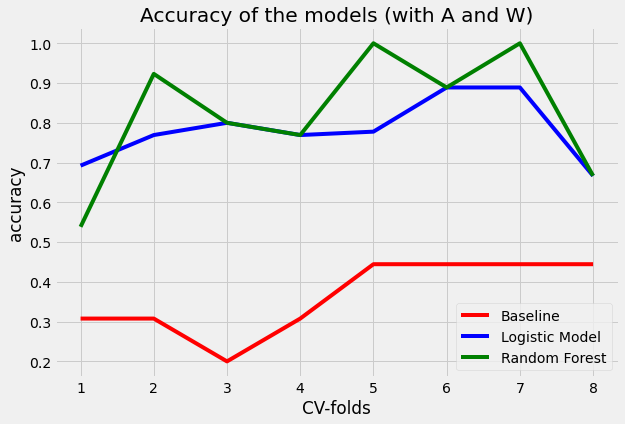

In [6]:
plt.figure(figsize=(9,6))
x = [i+1 for i in range(8)]
plt.plot(x,Baseline_accuracy, 'r-', label = "Baseline") #can be 'r--', 'bs', 'g^'
plt.plot(x,LogisticModel_accuracy, 'b-', label = "Logistic Model") #can be 'r--', 'bs', 'g^'
plt.plot(x,RandomForest_accuracy, 'g-', label = "Random Forest") #can be 'r--', 'bs', 'g^'
plt.ylabel('accuracy')
plt.xlabel('CV-folds')
plt.title('Accuracy of the models (with A and W)')
plt.legend()
#plt.savefig('picture/acc_1.jpg', bbox_inches="tight")
plt.show()